## Pakiety Matematyczne - wykład 4

<img src="DzienDobry.jpg">

### Rozwiązywanie równań:
<ul>
<li>Mamy do rozwiązania równanie postaci
$$f(x) = g(x).$$
<li>Interesują nas te równania, które nie mają rozwiązania
analitycznego.
<li>Równania te są równoważne równaniom postaci
$$F(x) = 0.$$
<li>W praktyce szukamy więc miejsc zerowych pewnej funkcji.
</ul>

### Mamy równanie $\sin(x)=x+\frac{1}{2}$. Spróbujemy je rozwiązać.

In [2]:
# symbolicznie:
import sympy.solvers as sol
import sympy as sym
import numpy as np
from sympy import Symbol
import math
x = Symbol('x')
y=sol.solve(x-0.5, x)
print(y)


[0.500000000000000]


In [2]:
help(sol.solve)

Help on function solve in module sympy.solvers.solvers:

solve(f, *symbols, **flags)
    Algebraically solves equations and systems of equations.
    
    Explanation
    
    Currently supported:
        - polynomial
        - transcendental
        - piecewise combinations of the above
        - systems of linear and polynomial equations
        - systems containing relational expressions
    
    Examples
    
    The output varies according to the input and can be seen by example:
    
        >>> from sympy import solve, Poly, Eq, Function, exp
        >>> from sympy.abc import x, y, z, a, b
        >>> f = Function('f')
    
    Boolean or univariate Relational:
    
        >>> solve(x < 3)
        (-oo < x) & (x < 3)
    
    
    To always get a list of solution mappings, use flag dict=True:
    
        >>> solve(x - 3, dict=True)
        [{x: 3}]
        >>> sol = solve([x - 3, y - 1], dict=True)
        >>> sol
        [{x: 3, y: 1}]
        >>> sol[0][x]
        3
        

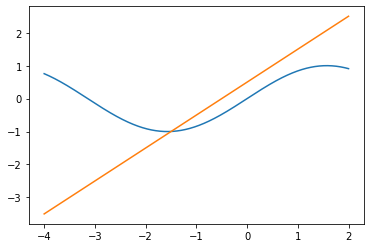

In [10]:
import matplotlib.pyplot as plt
x=np.linspace(-4,2,1000)
y=np.sin(x)
plt.plot(x,y,x,x+0.5)
plt.show()

In [4]:
x = Symbol('x')
sol.solve(x*x-9,x)

[-3, 3]

In [5]:
#funkcja lambda (czyli definiowanie własnej funkcji w jednej linijce)
f = lambda a : np.sin(a) - a-0.5
#sprawdźmy, że działa:
f(-1.5)

0.0025050133959455545

In [8]:
x=np.linspace(-4,2,1000)
y1=np.sin(x)
y2=x-0.5
(y1==y2).any()

False

### Metoda Bisekcji
<ol>
    <li>Szukamy dwóch punktów $a$ i $b$ tak, aby $F(a) ∗ F(b) < 0$.
    <li>Liczymy $c=\frac{a+b}{2}$.
    <li>Jeśli $F(c) ≈ 0$ to znaleźliśmy miejsce zerowe (koniec).
    <li>Jeśli $F(a) ∗ F(c) < 0$ to podstawiamy $b = c$.
    <li>Jeśli nie, to $F(c) ∗ F(b) < 0$ i podstawiamy $a = c$.
    <li>Wracamy do punktu drugiego algorytmu.
</ol>

In [67]:
# Uwaga: nie zadziała, bo Państwo nie macie funkcji Bisekcja
%run Bisekcja.py
Bisekcja(f,-2,5,dokladnosc=0.0001)
#OUT:   -1.4973182678222656

-1.4973182678222656

### Metoda Newtona
<ol>
<li> Przyjmujemy jakiś punkt startowy $x_0$.
<li> Jeśli $F(x_0) ≈ 0$ to znaleźliśmy miejsce zerowe (koniec).
<li> W punkcie $x_0$ znajdujemy styczną do $F(x)$.
<li> Znajdujemy miejsce przecięcia stycznej z osią OX
i przyjmujemy za nowe $x_0$.
<li> Wracamy do punktu drugiego algorytmu.
</ol>

In [12]:
#definiujemy pochodną naszej funkcji (na razie ręcznie)
f = lambda a : np.sin(a) - a-0.5
fp = lambda a : np.cos(a)-1

In [13]:
# Uwaga: nie zadziała, bo Państwo nie macie funkcji Newton
%run Newton.py
Newton(f,fp,1,dokladnosc=0.0001)
#OUT: -1.4973528860447223

-1.4973528860447223

( -1.4973003890958945 , 1.9984014443252818e-15 )


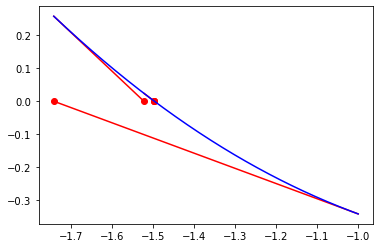

In [20]:
x0=Newton(f,fp,-1,dokladnosc=0.00000000000004,rysuj=True)
print("(",x0,",",f(x0),")")

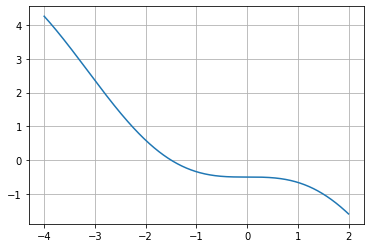

In [15]:
x=np.linspace(-4,2,1000)
y=np.sin(x)-x-0.5
plt.plot(x,y)
plt.grid()
plt.show()

In [21]:
#Ładniejsza funkcja:
f = lambda a : a*a
fp = lambda a : 2*a

( 0.03125 , 0.0009765625 )


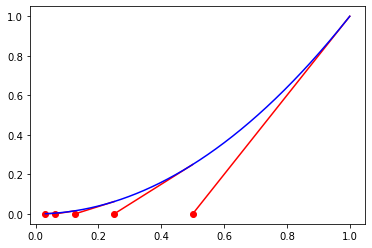

In [24]:
x0=Newton(f,fp,1,dokladnosc=0.001,rysuj=True)
print("(",x0,",",f(x0),")")

<img src="Newton5.jpg">

In [71]:
f = lambda a : np.sin(a) - a-0.5
x=np.linspace(-1.5,-1.4,101)
y=np.sin(x)-x-0.5
#x[np.abs(y)<0.005]
idx=(np.diff(np.sign(y))!=0)
idx=(list(idx))
idx.append(False)
x[idx]

array([-1.498])

### Rząd metody
<b>Uwaga</b> (Intuicje)<BR>
Rząd zbieżności metody niesie informację o tym, jak szybko
numeryczne rozwiązanie przybliżone zbliża się do rozwiązania
dokładnego. Im wyższy, tym lepiej (tym teoretycznie szybciej
otrzymamy rozwiązanie).

<b>Definicja</b> (metody iteracyjne)<BR>
Niech $\Phi : R \to R$ będzie pewną metodą iteracyjną poszukiwania
pierwiastków funkcji $f(x)$, czyli ciąg iteracji jest wyznaczany przez
$x_{n+1} = \Phi(x_n)$. Oznaczmy przez $\alpha$ szukane miejsce zerowe (czyli
$f(\alpha) = 0$) i załóżmy, że $\lim_{n\to\infty}x_n = \alpha$.

Liczbę rzeczywistą $p > 0$ nazywamy rzędem metody numerycznej
$\Phi$, jeżeli
$\lim_{n\to\infty}\frac{|x_{n+1} − \alpha|}{|x_n-\alpha|^p}=C\neq0$ 
dla pewnej stałej $C$.<br>
Inaczej<br>
$\forall n\in N\quad |x_{n+1} − \alpha| \leq C|x_n − \alpha|^p$.


<B>Przykład</B> (Metoda bisekcji)<br>
$|x_{n+1} − \alpha| < \frac{1}{2}|x_n − \alpha|^1$

<B>Przykład</B>
Załóżmy, że mamy dwie metody $\Phi_1$ rzędu 1 oraz $\Phi_{11}$ rzędu 2.
Załóżmy, że każdą z nich znaleźliśmy rozwiązanie z dokładnością
do $\varepsilon = 0.1$ (oraz stałe $C$ wynoszą 0.5 dla obu metod).
Wtedy w kolejnym kroku błąd metody $\Phi_1$ zmaleje do
$C · \varepsilon^1 = 0.05$, a błąd metody $\Phi_{11}$ wyniesie $C · \varepsilon^2 = 0.005$.

### Graficzne wyznaczanie rzędu metody
Do czego dąży wyrażenie
$\frac{\ln |x_{n+1} − \alpha|}{\ln |x_n − \alpha|}$
przy $n\to\infty$?

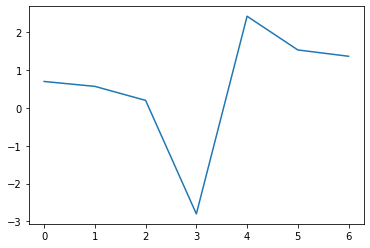

In [72]:
import numpy as np
import matplotlib.pyplot as plt
x=[10,5,2.5,1.2,0.6,0.29,0.15,0.075] # lista kolejnych iteracji rozwiązania przybliżonego
alfa=0
y=[np.log(x[i+1]-alfa)/np.log(x[i]-alfa) for i in range(0,7)]
plt.plot(y)
plt.show()